In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data 


In [39]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431896  6.446622  6.382907  6.414464  493729600
2010-01-05  6.443017  6.479383  6.409056  6.449630  601904800
2010-01-06  6.340531  6.468562  6.333919  6.443016  552160000
2010-01-07  6.328811  6.371488  6.282828  6.363974  477131200
2010-01-08  6.370886  6.371488  6.283129  6.320395  447610800


In [42]:

df = df.iloc[1:]  
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800
2010-01-11,6.314687,6.401543,6.264797,6.395532,462229600
2010-01-12,6.242856,6.304467,6.203785,6.287035,594459600
2010-01-13,6.330915,6.339331,6.134061,6.247366,605892000


In [44]:
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
1,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800
2,2010-01-11,6.314687,6.401543,6.264797,6.395532,462229600
3,2010-01-12,6.242856,6.304467,6.203785,6.287035,594459600
4,2010-01-13,6.330915,6.339331,6.134061,6.247366,605892000


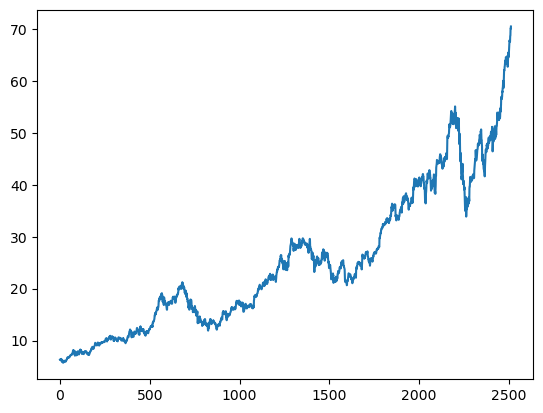

In [46]:
plt.plot(df.Close)

In [47]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2512,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03
mean,2015-01-02 11:31:20.254777088,25.164876,25.381758,24.931521,25.158491,2.993741e+08
min,2010-01-07 00:00:00,5.771906,5.890620,5.717810,5.781524,4.544800e+07
25%,2012-07-04 12:00:00,13.831543,13.958080,13.710821,13.856582,1.247008e+08
50%,2015-01-03 12:00:00,22.285822,22.460227,22.108387,22.255706,2.216474e+08
75%,2017-06-30 18:00:00,35.257804,35.668024,34.916843,35.299485,4.061120e+08
max,2019-12-30 00:00:00,70.485855,71.078241,69.663783,70.389146,1.880998e+09
std,NaN,13.897246,13.999641,13.774865,13.877916,2.352706e+08


In [49]:
df.shape

(2512, 6)

In [56]:
# data = pd.read_csv('Stock Prices Data Set.csv')
# data.head()

In [57]:
# data  = data.drop('symbol', axis=1)
# data.head()

In [58]:
# data = data.drop_duplicates(subset='date', keep='first')
# data.head()

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2507    57.137911
2508    57.335284
2509    57.571941
2510    57.799543
2511    58.026405
Name: Close, Length: 2512, dtype: float64

In [66]:
ma100.isna().sum()

99

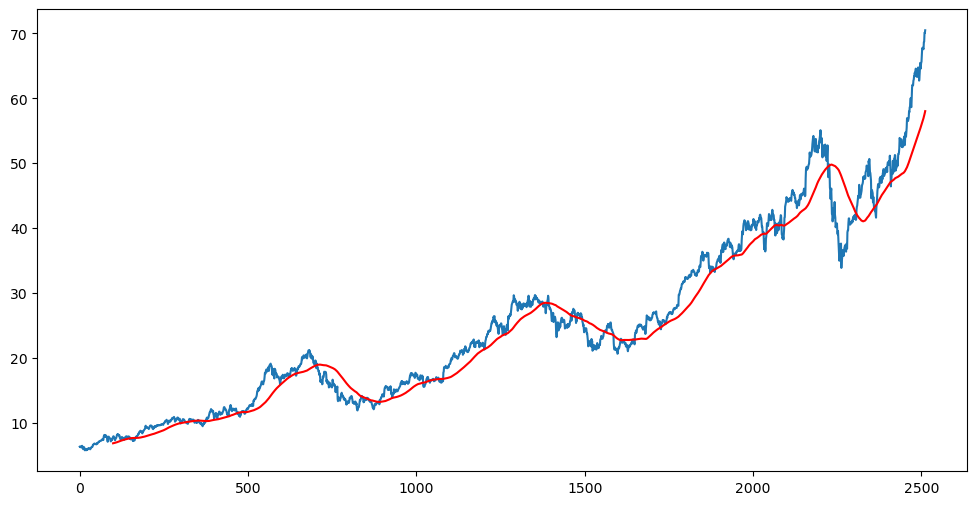

In [68]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.show()

In [69]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2507    52.096149
2508    52.223418
2509    52.356549
2510    52.487130
2511    52.616932
Name: Close, Length: 2512, dtype: float64

In [70]:
ma200.isna().sum()

199

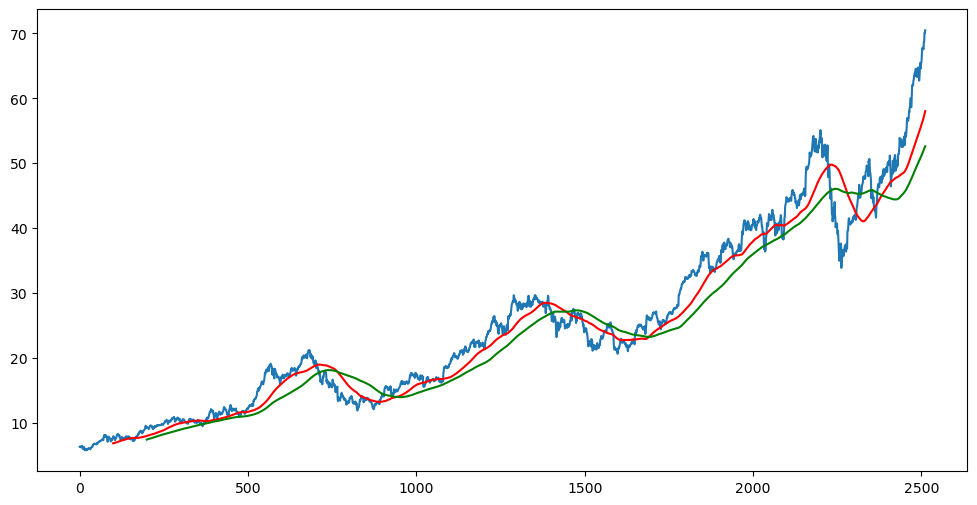

In [71]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [73]:
# df = df.drop[['Date','Volumn'],axis=1]

In [75]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):])
print(data_training.shape)
print(data_testing.shape)

(1758, 1)
(754, 1)


In [76]:
1758+754

2512

In [78]:
data_training.head()

,Close
0,6.328811
1,6.370886
2,6.314687
3,6.242856
4,6.330915


In [79]:
data_testing.head()

,Close
1758,26.751024
1759,26.827246
1760,26.797220
1761,26.933493
1762,27.233747


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02328911],
       [0.02504866],
       [0.02269848],
       ...,
       [0.891232  ],
       [0.8864025 ],
       [0.8861128 ]])

In [ ]:
x_train = []
y_train = []